In [1]:
#physical constant

cc=299792458      # m/s
me0=9.107e-31 # mass of electron kg
eps0=8.854e-12   # permitivity of free-space
mu0=4*pi*1e-7  # H/m
qe=1.602e-19 #C
Bzk=1.380e-23 # Boltzmann's constant j/K
Pkh=6.626e-34  # Planck's constant  J-sec
using PyPlot

In [2]:
# RF Frequencies
frf=704e6
Trf=1/frf
Krf=2*pi/(cc*Trf)
Omegarf=2*pi*frf
Lcaveff=1.06 #m
RoQ5cell=500;  # R/Q per cell
Q0=2e10;
Lamdarf=cc/frf
print(frf)
Lcell=Lamdarf/2

7.04e8

0.21292077982954546

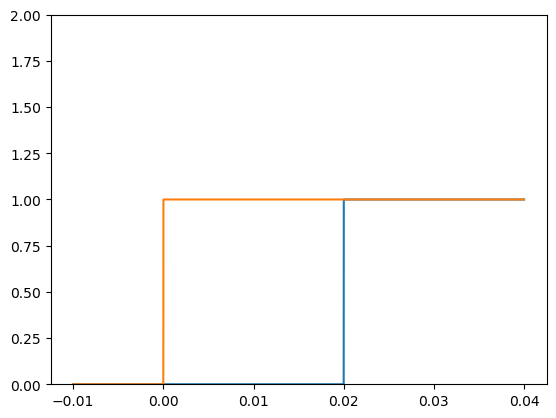

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9341454e10>

In [3]:
function Unitfuction(t,pulsewidth)
    if t<=0
        return 0
    else
        return 1
    end
end  
Rflength=0.02 #30ms
Ttotal=0.04
dt=Ttotal/1e6
xt=-0.01:dt:Ttotal
plot(xt,map(t->(Unitfuction(t,Rflength)*0+1*Unitfuction(t-1*Rflength,Rflength)),xt))
ylim(0,2)
plot(xt,map(t->(Unitfuction(t,Rflength)*1+0*Unitfuction(t-1*Rflength,Rflength)),xt))


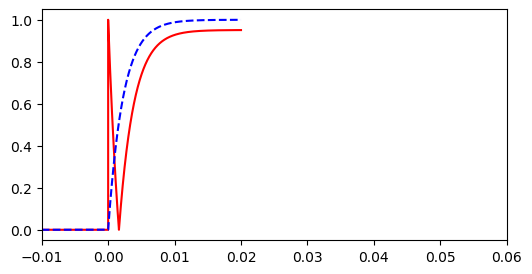

0.7561666919576567

In [4]:
Qe=5e6
Q0=2e8
beta=Q0/Qe
Rflength=0.03 #30ms
Ttotal=0.02
dt=Ttotal/1e6
xt=-0.01:dt:Ttotal

function RF_reflection(t,QL,beta_FPC,pulsewidth)
    f1(t,QL,beta_FPC,pulsewidth)=-(1-beta_FPC)/(1+beta_FPC)-2*beta_FPC/(1+beta_FPC)*exp(-Omegarf*t/2/QL)
    if t<0
        return 0
    elseif 0<=t<=pulsewidth
        return abs(f1(t,QL,beta_FPC,pulsewidth))
    elseif t>=pulsewidth
        return (f1(t,QL,beta_FPC,pulsewidth)-(f1(t-pulsewidth,QL,beta_FPC,pulsewidth)))
    end
    
end
fig=figure(figsize=(6,3))
plot(xt,map(t->RF_reflection(t,Qe,beta,Rflength),xt),"r-")
xlim(-0.01,0.06)
#
function RF_filling(t,QL,beta_FPC,pulsewidth)
    if t<=0
        return 0
    elseif t<=pulsewidth
        return 1-exp(-Omegarf*t/2/QL)
    elseif t>=pulsewidth*0.9 
        return exp(-Omegarf*(t-pulsewidth)/2/QL)
    elseif t>=pulsewidth*1 
        return exp(-Omegarf*(t-pulsewidth)/2/QL)
    end
end
        
plot(xt,map(t->RF_filling(t,Qe,beta,Rflength),xt),"b--")


#plot(xt,abs(map(t->f2try(t,3e5,1e11/3e5,Rflength),xt)),"b--")
#plot(xt,abs(map(t->f1(t,3e7,1e4/3e7,Rflength),xt)),"ro")
abs(RF_reflection(0.0001,8.6e5,1e6/8.6e5,Rflength))

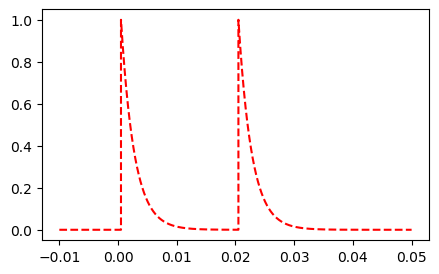

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9311b2cc90>

In [5]:
# trun on
Pf=1
Tstart=0.0005
pulselength=0.02

function RF_power(t,QL,beta_FPC,pulsewidth)
    if t<Tstart
        return 0
    elseif Tstart<=t<=pulsewidth+Tstart
        return (1-2*beta_FPC/(1+beta_FPC)*(1-exp(-Omegarf*(t-Tstart)/2/QL)))^2*Pf
    else t>=pulsewidth+Tstart
        return 4*beta_FPC^2/(1+beta_FPC)^2*exp(-Omegarf*(t-pulsewidth-Tstart)/QL)*Pf
    end
end
Ttotal=0.05
dt=Ttotal/1e6
xt=-0.01:dt:Ttotal
fig=figure(figsize=(5,3))
plot(xt,(map(t->RF_power(t,1e7,1e7/1e7,pulselength),xt)),"r--")        

In [6]:
function s11(beta1,beta2,Qu,f,f0)
  deltaf=f/f0-f0/f
    s11=((1-beta1+beta2)-1im*2*Qu*deltaf)/(1+beta1+beta2+1im*2*Qu*deltaf)
 return s11
end

function s21(beta1,beta2,Qu,f,f0)
  deltaf=f/f0-f0/f
 
  s21=2sqrt(beta1*beta2)/(1+beta1+beta2+1im*2*Qu*deltaf)
    return s21
end

function s12(beta1,beta2,Qu,f,f0)
  deltaf=f/f0-f0/f
   s12=2sqrt(beta1*beta2)/(1+beta1+beta2+1im*2*Qu*deltaf)
    return s12
end

function s22(beta1,beta2,Qu,f,f0)
  deltaf=f/f0-f0/f
    s22 =((1+beta1-beta2)-1im*2*Qu*deltaf)/(1+beta1+beta2+1im*2*Qu*deltaf)
    return s22
end


s22 (generic function with 1 method)

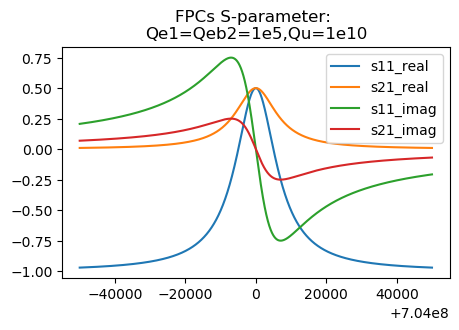

PyObject Text(0.5, 1, 'FPCs S-parameter: \nQe1=Qeb2=1e5,Qu=1e10')

In [23]:
Qu=5e4
beta1=Qu/1e5
beta2=Qu/1e5
f0=704e6
fx=703.95e6:1e1:704.05e6
fig=figure(figsize=(5,3))
plot(fx,map(f->real(s11(beta1,beta2,Qu,f,f0)),fx),label="s11_real")
plot(fx,map(f->real(s21(beta1,beta2,Qu,f,f0)),fx),label="s21_real")
plot(fx,map(f->imag(s11(beta1,beta2,Qu,f,f0)),fx),label="s11_imag")
plot(fx,map(f->imag(s21(beta1,beta2,Qu,f,f0)),fx),label="s21_imag")
#yscale("log")
legend()
title("FPCs S-parameter: 
Qe1=Qeb2=1e5,Qu=1e10")

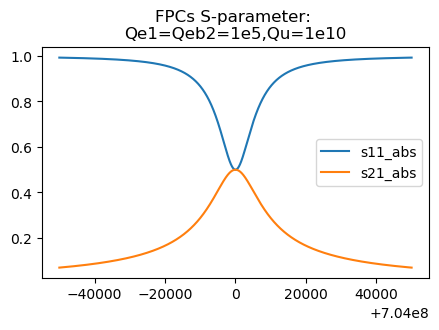

PyObject Text(0.5, 1, 'FPCs S-parameter: \nQe1=Qeb2=1e5,Qu=1e10')

In [24]:
Qu=5e4
beta1=Qu/1e5
beta2=Qu/1e5
f0=704e6
fx=703.95e6:1e1:704.05e6
fig=figure(figsize=(5,3))
plot(fx,map(f->abs(s11(beta1,beta2,Qu,f,f0)),fx),label="s11_abs")
plot(fx,map(f->abs(s21(beta1,beta2,Qu,f,f0)),fx),label="s21_abs")
#yscale("log")
legend()
title("FPCs S-parameter: 
Qe1=Qeb2=1e5,Qu=1e10")


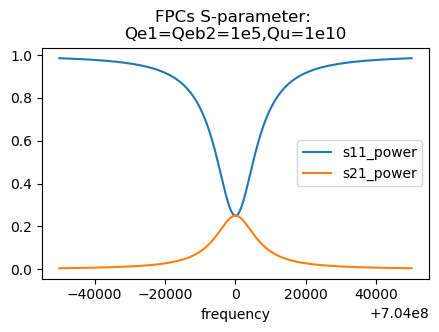

PyObject Text(0.5, 23.999999999999993, 'frequency')

In [25]:
Qu=5e4
beta1=Qu/1e5
beta2=Qu/1e5
f0=704e6
fx=703.95e6:1e1:704.05e6
fig=figure(figsize=(5,3))
#plot(fx,map(f->(1-abs(s11(beta1,beta2,Qu,f,f0))^2-abs(s21(beta1,beta2,Qu,f,f0))^2),fx),label="Pcav")
plot(fx,map(f->abs(s11(beta1,beta2,Qu,f,f0))^2,fx),label="s11_power")
plot(fx,map(f->abs(s21(beta1,beta2,Qu,f,f0))^2,fx),label="s21_power")
#yscale("log")
legend()
title("FPCs S-parameter: 
Qe1=Qeb2=1e5,Qu=1e10")
xlabel("frequency")

In [10]:
Qu=1e10
beta1=Qu/1e5
beta2=Qu/1e5
f0=704e6
f1=704.99e6
[[s11(beta1,beta2,Qu,f0,f0)^2,s12(beta1,beta2,Qu,f0,f0)^2] [s21(beta1,beta2,Qu,f0,f0)^2,s22(beta1,beta2,Qu,f0,f0)^2]]

2×2 Array{Complex{Float64},2}:
 2.49998e-11-0.0im      0.99999-0.0im
     0.99999-0.0im  2.49998e-11-0.0im

In [11]:
(1-abs(s21(beta1,beta2,Qu,f0,f0)))^2

2.499975000204209e-11

In [12]:
[[s11(beta1,beta2,Qu,f1,f0)^2,s12(beta1,beta2,Qu,f1,f0)^2] [s21(beta1,beta2,Qu,f1,f0)^2,s22(beta1,beta2,Qu,f1,f0)^2]]

2×2 Array{Complex{Float64},2}:
    0.999962+0.007116im    -1.26593e-5-9.00863e-8im
 -1.26593e-5-9.00863e-8im     0.999962+0.007116im

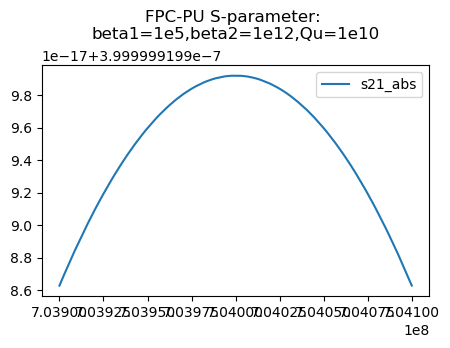

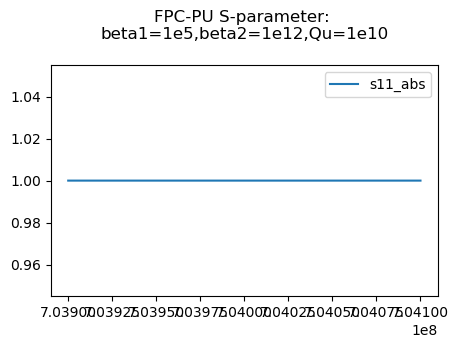

PyObject Text(0.5, 1, 'FPC-PU S-parameter: \nbeta1=1e5,beta2=1e12,Qu=1e10\n')

In [13]:
beta1=1e5
beta2=1e12
Qu=1e10
f0=704e6
fx=703.9e6:1e1:704.1e6
fig=figure(figsize=(5,3))
plot(fx,map(f->abs(s21(beta1,beta2,Qu,f,f0))^2,fx),label="s21_abs")
#yscale("log")
#ylim(-1.2,1.2)
legend()
title("FPC-PU S-parameter: 
beta1=1e5,beta2=1e12,Qu=1e10
")

fig=figure(figsize=(5,3))
plot(fx,map(f->abs(s11(beta1,beta2,Qu,f,f0)),fx),label="s11_abs")
#yscale("log")
#ylim(-1.2,1.2)
legend()
title("FPC-PU S-parameter: 
beta1=1e5,beta2=1e12,Qu=1e10
")

In [14]:
L=10e-6
C=1.01e-12
1./sqrt(L*C)/2/pi

LoadError: syntax: invalid syntax "1./"; add space(s) to clarify

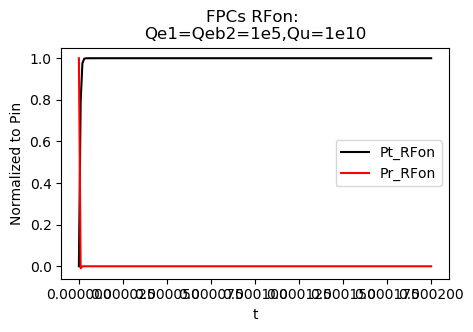

PyObject Text(24.000000000000007, 0.5, 'Normalized to Pin')

In [15]:
# Steady state equation 2 port model

function Pt_RFon(beta1,beta2,Qu,f,f0,t)
    Pin=1
    deltaf=f/f0-f0/f
    omega0=2*pi*f0
    QL=Q0/(1+beta1+beta2)
    omega_new=omega0*sqrt(1-1/4/QL^2)
    coeff_pt=4*beta1*beta2/(1+beta1+beta2)^2/(1+QL^2*deltaf^2)
    Pt_on=coeff_pt*(1+exp(-omega0/QL*t)-2*exp(-omega0/2/QL*t)*cos(omega_new*t))*Pin 
   return Pt_on
end

function Pr_RFon(beta1,beta2,Qu,f,f0,t)
    Pin=1
    deltaf=f/f0-f0/f
    omega0=2*pi*f0
    QL=Q0/(1+beta1+beta2)
    omega_new=omega0*sqrt(1-1/4/QL^2)
    # note Pr is on resonant
    coeff_pr1=4*beta1/(1+beta1+beta2)^2
    coeff_pr2=4*beta1/(1+beta1+beta2)
    coeff_pr3=4*beta1*beta2/(1+beta1+beta2)^2
    Pr_on=1-(coeff_pr1+coeff_pr3)*(1-exp(-omega0/2/QL*t))^2-coeff_pr2*exp(-omega0/2/QL*t)*(1-exp(-omega0/QL*t))
    return  Pr_on
end


Qu=1e10
beta1=Qu/1e5
beta2=Qu/1e5
f0=704e6
f1=f0
tx_on=0:1e-6:2e-4
fig=figure(figsize=(5,3))
plot(tx_on,map(t->Pt_RFon(beta1,beta2,Qu,f1,f0,t),tx_on),"k-",label="Pt_RFon")
#fig=figure(figsize=(5,3))
plot(tx_on,map(t->Pr_RFon(beta1,beta2,Qu,f1,f0,t),tx_on),"r-",label="Pr_RFon")
#ylim(0,1e-6)
#xlim(-1e-5,1e-3)
legend()
title("FPCs RFon: 
Qe1=Qeb2=1e5,Qu=1e10")
xlabel("t")
ylabel("Normalized to Pin")

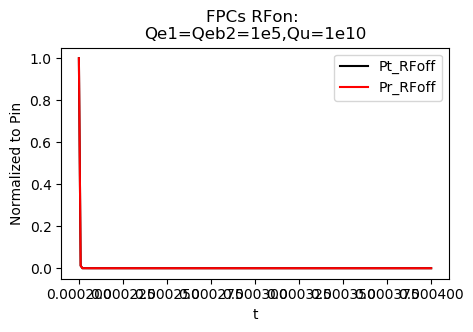

PyObject Text(24.000000000000007, 0.5, 'Normalized to Pin')

In [16]:
# Steady state equation 2 port model

function Pt_RFoff(beta1,beta2,Qu,f,f0,t,tau0)
    Pt0=1
    deltaf=f/f0-f0/f
    omega0=2*pi*f0
    QL=Q0/(1+beta1+beta2)

    Pt_off=exp(-omega0/QL*(t-tau0))*Pt0 
   return Pt_off
end

function Pr_RFoff(beta1,beta2,Qu,f,f0,t,tau0)
    Pe0=1
    omega0=2*pi*f0
     QL=Q0/(1+beta1+beta2)
    Pr_off=exp(-omega0/QL*(t-tau0))*Pe0 
    return  Pr_off
end


Qu=1e10
beta1=Qu/1e5
beta2=Qu/1e5
f0=704e6
f1=f0
tau0=2e-4
tx_off=tau0:1e-6:tau0+2e-4

fig=figure(figsize=(5,3))
plot(tx_off,map(t->Pt_RFoff(beta1,beta2,Qu,f1,f0,t,tau0),tx_off),"k-",label="Pt_RFoff")
#fig=figure(figsize=(5,3))
plot(tx_off,map(t->Pr_RFoff(beta1,beta2,Qu,f1,f0,t,tau0),tx_off),"r-",label="Pr_RFoff")
#ylim(0,1e-6)
#xlim(-1e-5,1e-3)
legend()
title("FPCs RFon: 
Qe1=Qeb2=1e5,Qu=1e10")
xlabel("t")
ylabel("Normalized to Pin")

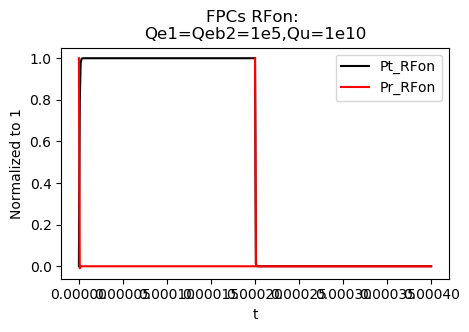

PyObject Text(24.000000000000007, 0.5, 'Normalized to 1')

In [17]:
fig=figure(figsize=(5,3))
plot(tx_on,map(t->Pt_RFon(beta1,beta2,Qu,f1,f0,t),tx_on),"k-",label="Pt_RFon")
plot(tx_off,map(t->Pt_RFoff(beta1,beta2,Qu,f1,f0,t,tau0),tx_off),"k-")
#fig=figure(figsize=(5,3))
plot(tx_on,map(t->Pr_RFon(beta1,beta2,Qu,f1,f0,t),tx_on),"r-",label="Pr_RFon")
plot(tx_off,map(t->Pr_RFoff(beta1,beta2,Qu,f1,f0,t,tau0),tx_off),"r-")
legend()
title("FPCs RFon: 
Qe1=Qeb2=1e5,Qu=1e10")
xlabel("t")
ylabel("Normalized to 1")